## Hydrogen abstraction of methane by chlorine atoms: Arrhenius plot

Compare calculated reaction rate constants with experimental ones.

We are going to compare the following atmospheric reaction with experimental
results:

$$
\require{mhchem}
\ce{Cl + CH4 -> HCl + CH3}
$$

NASA reports an accepted value of $1.0 \times 10^{-13} \text{cm}^3 \text{molecule}^{-1} \text{s}^{-1}$
:cite:`Burkholder_2015`. In fact the following is a plot of the accepted
Arrhenius plot of their accepted regression, together with uncertainty bands:

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from rich import print

import overreact as rx
from overreact import constants
from overreact import datasets

In [2]:
sns.set(style="white", palette="colorblind")

In [3]:
# temperatures = np.array([181, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 298.15, 300, 400, 410])
temperatures = np.array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 298.15, 300])

temperatures = temperatures[(temperatures >= 200) & (temperatures <= 300)]
temperatures

array([200.  , 210.  , 220.  , 230.  , 240.  , 250.  , 260.  , 270.  ,
       280.  , 290.  , 298.15, 300.  ])

In [4]:
# k_exp = 2.36e-12 * (temperatures / 298.0) ** (1.37) * np.exp(-939.0 / temperatures)
# f = 1.05 * np.exp(50 * (1.0 / temperatures - 1.0 / 298.0))

k_exp = np.array(
    [
        1.0e-14,
        1.4e-14,
        1.9e-14,
        2.5e-14,
        3.22e-14,
        4.07e-14,
        5.05e-14,
        6.16e-14,
        7.41e-14,
        8.81e-14,
        10.0e-14,
        10.3e-14,
    ]
)
k_exp

array([1.00e-14, 1.40e-14, 1.90e-14, 2.50e-14, 3.22e-14, 4.07e-14,
       5.05e-14, 6.16e-14, 7.41e-14, 8.81e-14, 1.00e-13, 1.03e-13])

In [5]:
basissets = [
    # '6-311G(d,p)',  # ΔH‡(T=1) = 7.43 kcal/mol
    # '6-311+G(d,p)',  # ΔH‡(T=1) = 7.18 kcal/mol
    # '6-311G(3df)',  # ΔH‡(T=1) = 6.43 kcal/mol
    # '6-311G(2d,p)',  # ΔH‡(T=1) = 5.74 kcal/mol
    # '6-311G(2d,2p)',  # ΔH‡(T=1) = 4.66 kcal/mol
    'cc-pVTZ',  # ΔH‡(T=1) = 4.20 kcal/mol (closest to Tanaka's result, 4.08 kcal/mol)
    # '6-311G(2df,2p)',  # ΔH‡(T=1) = 3.72 kcal/mol
    # '6-311G(2df,2pd)',  # ΔH‡(T=1) = 2.83 kcal/mol (closest to experiment, 2.8 kcal/mol)
    # '6-311G(3df,3pd)',  # ΔH‡(T=1) = 1.20 kcal/mol
]
basisset = basissets[-1]
# bias = -0.08 * constants.kcal  # based on linear regression against k_exp and UMP2/cc-pVTZ
bias = 0.0

model = rx.parse_model(
    os.path.join(datasets.data_path, f"tanaka1996/UMP2/{basisset}/model.k")
)

k_cla = []
k_wig = []
k_eck = []
for temperature in temperatures:
    k_cla.append(
        rx.get_k(
            model.scheme,
            model.compounds,
            temperature=temperature,
            scale="cm3 particle-1 s-1",
            tunneling=None,
            bias=bias,
        )
    )
    k_wig.append(
        rx.get_k(
            model.scheme,
            model.compounds,
            temperature=temperature,
            scale="cm3 particle-1 s-1",
            tunneling="wigner",
            bias=bias,
        )
    )
    k_eck.append(
        rx.get_k(
            model.scheme,
            model.compounds,
            temperature=temperature,
            scale="cm3 particle-1 s-1",
            bias=bias,
        )
    )
k_cla = np.asarray(k_cla).flatten()
k_wig = np.asarray(k_wig).flatten()
k_eck = np.asarray(k_eck).flatten()
k_eck

l entropy for atomic system
assuming zero vibrational entropy for atomic system
assuming zero rotational energy for atomic system
assuming zero vibrational energy for atomic system
assuming zero rotational entropy for atomic system
assuming zero vibrational entropy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero vibrational energy for atomic system
assuming ground state as electronic energy at zero temperature
assuming rotational energy zero at zero temperature
assuming zero point as vibrational energy at zero temperature
assuming rotational energy zero at zero temperature
assuming ground state as electronic energy at zero temperature
assuming rotational energy ze

array([1.02457728e-14, 1.35475511e-14, 1.76417811e-14, 2.26549469e-14,
       2.87229825e-14, 3.59909711e-14, 4.46128444e-14, 5.47510898e-14,
       6.65764680e-14, 8.02677422e-14, 9.29353639e-14, 9.60114181e-14])

In [6]:
err = -constants.R * temperatures * np.log(k_eck / k_exp)
np.mean(err / constants.kcal)

0.04357458107105977

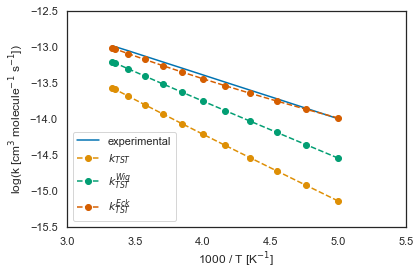

In [7]:
fig, ax = plt.subplots()

ax.plot(1000 / temperatures, np.log10(k_exp), label="experimental")
# ax.fill_between(
#     1000 / temperatures,
#     np.log10(k_exp / f ** 2),
#     np.log10(k_exp * f ** 2),
#     label="95% confidence",
#     alpha=0.5,
# )

plt.plot(1000 / temperatures, np.log10(k_cla), "o--", label=r"$k_{TST}$")
plt.plot(1000 / temperatures, np.log10(k_wig), "o--", label=r"$k_{TST}^{Wig}$")
plt.plot(1000 / temperatures, np.log10(k_eck), "o--", label=r"$k_{TST}^{Eck}$")

ax.set_ylabel(r"log(k [cm$^3$ molecule$^{-1}$ s$^{-1}$])")
ax.set_xlabel(r"1000 / T [K$^{-1}$]")
ax.set_xlim(3, 5.5)
ax.set_ylim(-15.5, -12.5)

ax.legend()
fig.tight_layout()

In [8]:
linregress_eck = stats.linregress(np.log10(k_eck).flatten(), np.log10(k_exp))

print("Classic ~", stats.linregress(np.log10(k_cla).flatten(), np.log10(k_exp)))
print("Wigner  ~", stats.linregress(np.log10(k_wig).flatten(), np.log10(k_exp)))
print("Eckart  ~", linregress_eck)

Classic ~ LinregressResult(slope=0.6444197901397659, intercept=-4.235160568649004, rvalue=0.999930526097228, pvalue=1.2744087878290986e-20, stderr=0.0024022452606919935)
Wigner  ~ LinregressResult(slope=0.7570224630227191, intercept=-2.9819671329537076, rvalue=0.9999465320008618, pvalue=3.440975041366305e-21, stderr=0.002475643736570185)
Eckart  ~ LinregressResult(slope=1.0312686851465052, intercept=0.45631341363839084, rvalue=0.9989384257066392, pvalue=1.0598245622580702e-14, stderr=0.01503862105597948)


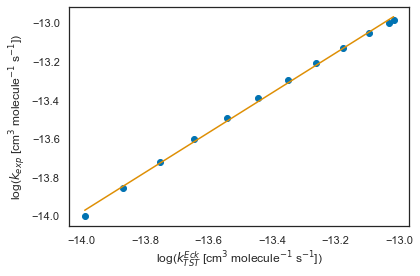

In [9]:
x = np.log10(k_eck).flatten()
plt.plot(x, np.log10(k_exp), "o")

x = np.linspace(x.min(), x.max())
plt.plot(x, linregress_eck.slope * x + linregress_eck.intercept, "-")

plt.ylabel(r"log($k_{exp}$ [cm$^3$ molecule$^{-1}$ s$^{-1}$])")
plt.xlabel(r"log($k_{TST}^{Eck}$ [cm$^3$ molecule$^{-1}$ s$^{-1}$])")

plt.tight_layout()